Base directory: C:\Workspace\A
Data directory: C:\Workspace\A\data
Model directory: C:\Workspace\A\models
Model path: C:\Workspace\A\models\best_model.h5

Checking paths:
Data directory exists: True
X_test.npy exists: True
y_test.npy exists: True
Model exists: True
18873/18873 ━━━━━━━━━━━━━━━━━━━━ 66s 3ms/step

=== Model Metrics ===
Mean Absolute Error: 1.96
Root Mean Squared Error: 7.47
R² Score: -0.0369
Error during evaluation: Unable to allocate 2.65 TiB for an array with shape (603909, 603909) and data type float64


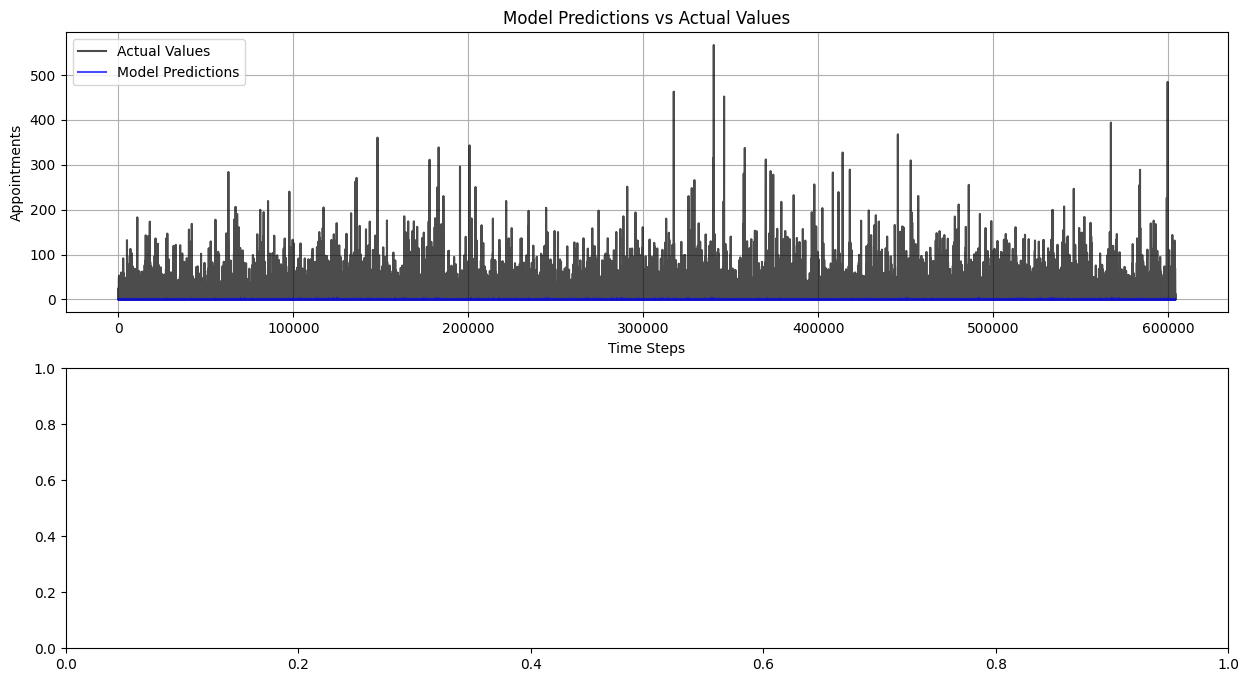

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
import os
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import joblib
import math

def evaluate_models():
    # Configure paths
    base_dir = r'C:\Workspace\A'
    data_dir = os.path.join(base_dir, 'data')
    model_dir = os.path.join(base_dir, 'models')
    model_path = os.path.join(model_dir, 'best_model.h5')
    
    # Print paths for debugging
    print(f"Base directory: {base_dir}")
    print(f"Data directory: {data_dir}")
    print(f"Model directory: {model_dir}")
    print(f"Model path: {model_path}")
    
    # Check if directories and files exist
    print(f"\nChecking paths:")
    print(f"Data directory exists: {os.path.exists(data_dir)}")
    print(f"X_test.npy exists: {os.path.exists(os.path.join(data_dir, 'X_test.npy'))}")
    print(f"y_test.npy exists: {os.path.exists(os.path.join(data_dir, 'y_test.npy'))}")
    print(f"Model exists: {os.path.exists(model_path)}")
    
    try:
        # Load test data
        X_test = np.load(os.path.join(data_dir, 'X_test.npy'))
        y_test = np.load(os.path.join(data_dir, 'y_test.npy'))
        
        # Load model
        model = load_model(model_path)
        
        # Generate predictions
        predictions = model.predict(X_test)
        
        # Calculate metrics
        mae = mean_absolute_error(y_test, predictions)
        mse = mean_squared_error(y_test, predictions)
        rmse = math.sqrt(mse)
        r2 = r2_score(y_test, predictions)
        
        print("\n=== Model Metrics ===")
        print(f"Mean Absolute Error: {mae:.2f}")
        print(f"Root Mean Squared Error: {rmse:.2f}")
        print(f"R² Score: {r2:.4f}")
        
        # Generate detailed comparison plot
        plt.figure(figsize=(15,8))
        
        # Plot actual vs predicted values
        plt.subplot(2,1,1)
        plt.plot(y_test, label='Actual Values', color='black', alpha=0.7)
        plt.plot(predictions, label='Model Predictions', color='blue', alpha=0.7)
        plt.title('Model Predictions vs Actual Values')
        plt.xlabel('Time Steps')
        plt.ylabel('Appointments')
        plt.legend()
        plt.grid(True)
        
        # Plot prediction errors
        plt.subplot(2,1,2)
        plt.plot(predictions - y_test, label='Prediction Error', color='blue', alpha=0.7)
        plt.axhline(y=0, color='black', linestyle='--')
        plt.title('Prediction Errors Over Time')
        plt.xlabel('Time Steps')
        plt.ylabel('Error')
        plt.legend()
        plt.grid(True)
        
        plt.tight_layout()
        plt.savefig(os.path.join(model_dir, 'model_evaluation.png'))
        plt.close()
        
        # Save metrics to file
        with open(os.path.join(model_dir, 'evaluation_metrics.txt'), 'w') as f:
            f.write("=== Model Metrics ===\n")
            f.write(f"Mean Absolute Error: {mae:.2f}\n")
            f.write(f"Root Mean Squared Error: {rmse:.2f}\n")
            f.write(f"R² Score: {r2:.4f}\n")
            
        # Additional statistics
        print("\n=== Additional Statistics ===")
        print(f"Average Actual Value: {np.mean(y_test):.2f}")
        print(f"Average Predicted Value: {np.mean(predictions):.2f}")
        print(f"Standard Deviation of Actual Values: {np.std(y_test):.2f}")
        print(f"Standard Deviation of Predictions: {np.std(predictions):.2f}")
        print(f"Maximum Absolute Error: {np.max(np.abs(predictions - y_test)):.2f}")
            
    except Exception as e:
        print(f"Error during evaluation: {str(e)}")

if __name__ == "__main__":
    evaluate_models()